In [56]:
#importing all the required libraries
import pandas as pd
import numpy as np
import sklearn as sk
import pickle
from sklearn.feature_extraction.text import CountVectorizer

In [57]:
df = pd.read_csv('DE_train.csv')

In [58]:
df.head()

,sentence,is_counterfactual
0,Komischwerweise wir der Monitor bei Weißen Bil...,1
1,Fände es allerdings schöner wenn die ganze Be...,1
2,eine gepolsterten fürs Notebook fassen alles w...,1
3,Außer dass ich den Preis etwas zu hoch finde (...,0
4,Ich hätte mir das Album besser vorher anhören ...,1


In [59]:
df.tail()

,sentence,is_counterfactual
5595,"Falls jemand auf die Idee kommt, dass vielleic...",1
5596,"Nun denn, der Geruch könnte ja evtl.",1
5597,In dem Film fehlt mit persönlich etwas die Action,0
5598,"Ansonsten wäre mir der Film 3,5 Sterne wert.",1
5599,Die Geschichte des Grand Budapest Hotel ist ei...,0


In [60]:
df.info

<bound method DataFrame.info of                                                sentence  is_counterfactual
0     Komischwerweise wir der Monitor bei Weißen Bil...                  1
1     Fände es allerdings schöner  wenn die ganze Be...                  1
2     eine gepolsterten fürs Notebook fassen alles w...                  1
3     Außer dass ich den Preis etwas zu hoch finde (...                  0
4     Ich hätte mir das Album besser vorher anhören ...                  1
...                                                 ...                ...
5595  Falls jemand auf die Idee kommt, dass vielleic...                  1
5596               Nun denn, der Geruch könnte ja evtl.                  1
5597  In dem Film fehlt mit persönlich etwas die Action                  0
5598       Ansonsten wäre mir der Film 3,5 Sterne wert.                  1
5599  Die Geschichte des Grand Budapest Hotel ist ei...                  0

[5600 rows x 2 columns]>

In [61]:
#Taking the input and output features seperately
X = df['sentence']
Y = np.asarray(df['is_counterfactual'], dtype = int)

In [62]:
#importing MultinomialNB
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [63]:
#splitting the data into training and testing set  with test size is 30%
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=109) # 70% training and 30% test

In [64]:
X_test

4098    Schade - denn das ist eigentlich eine gute Sac...
5232    Zum Anderen ist er manchmal aber auch etwas la...
4030    Hätte ich mir sparen können, leider war der Fi...
1799    71 ist ein schönes alter, aber er hätte älter ...
2815    Der Preis liegt meist ein wenig höher, als and...
                              ...                        
2994    Auch wenn es am Ende etwas unrealistisch wird,...
4819    Erhalten habe ich zwei hervorragende Lautsprec...
1053    Es wäre echt Schade, wenn es die XD karten nic...
349           Das könnte die Firma bestimmt besser lösen.
5517    Mit 'Cross in You' befindet sich ein Bonystrac...
Name: sentence, Length: 1680, dtype: object

In [65]:
y_test

array([1, 0, 1, ..., 1, 1, 1])

# Naive Bayes

In [66]:
nb = MultinomialNB()

In [67]:
#Converting the review (text feature) to numerical features
cv = CountVectorizer()
x = cv.fit_transform(X_train)
y = cv.transform(X_test)

In [68]:
# Fitting the model
nb.fit(x, y_train)

MultinomialNB()

In [69]:
y_pred=nb.predict(y)

In [70]:
# Training Accuracy
nb.score(x, y_train)

0.9510204081632653

In [71]:
# Testing Accuracy
nb.score(y, y_test)

0.8244047619047619

In [72]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62       502
           1       0.81      0.97      0.89      1178

    accuracy                           0.82      1680
   macro avg       0.85      0.72      0.75      1680
weighted avg       0.83      0.82      0.81      1680



<IPython.core.display.Javascript object>

<AxesSubplot:>

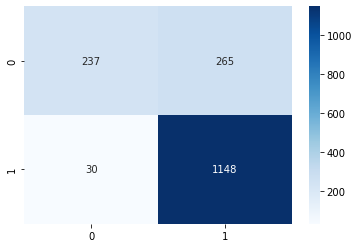

In [73]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
data=confusion_matrix(y_test, y_pred)

sns.heatmap(data, annot=True,fmt="d",cmap='Blues')

<h3> Implementing with the SVM </h3>

In [74]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

In [75]:
#Train the model using the training sets
clf.fit(x, y_train)

SVC(kernel='linear')

In [76]:
#Predict the response for test dataset
y_pred = clf.predict(y)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [77]:
clf.score(x, y_train) #Training accuracy

0.9982142857142857

In [78]:
clf.score(y, y_test) # Testing accuracy

0.9041666666666667

In [79]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       502
           1       0.92      0.94      0.93      1178

    accuracy                           0.90      1680
   macro avg       0.89      0.88      0.88      1680
weighted avg       0.90      0.90      0.90      1680



<IPython.core.display.Javascript object>

<AxesSubplot:>

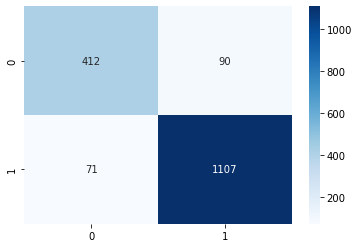

In [80]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
data=confusion_matrix(y_test, y_pred)

sns.heatmap(data, annot=True,fmt="d",cmap='Blues')

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### RandomForestClassifier

In [82]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4, random_state=0)
clf.fit(x, y_train)

RandomForestClassifier(max_depth=4, random_state=0)

In [83]:
clf.score(x, y_train) #Training accuracy

0.6854591836734694

In [84]:
clf.score(y, y_test) # Testing accuracy

0.7011904761904761

In [85]:
y_pred = clf.predict(y)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [86]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       502
           1       0.70      1.00      0.82      1178

    accuracy                           0.70      1680
   macro avg       0.35      0.50      0.41      1680
weighted avg       0.49      0.70      0.58      1680



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

<AxesSubplot:>

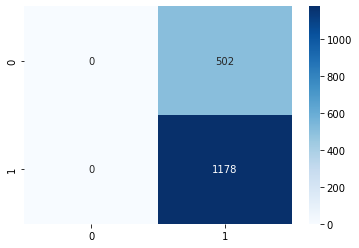

In [87]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
data=confusion_matrix(y_test, y_pred)

sns.heatmap(data, annot=True,fmt="d",cmap='Blues')

# MultiLayer Perceptron

In [88]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300).fit(x, y_train)
y_pred = clf.predict(y)
y_pred

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


array([1, 0, 1, ..., 1, 1, 1])

In [89]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       502
           1       0.91      0.94      0.92      1178

    accuracy                           0.89      1680
   macro avg       0.88      0.86      0.87      1680
weighted avg       0.89      0.89      0.89      1680



<IPython.core.display.Javascript object>

<AxesSubplot:>

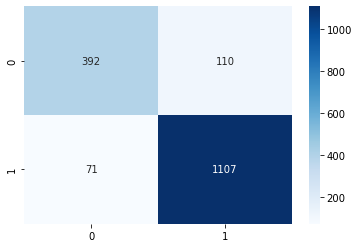

In [91]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
data=confusion_matrix(y_test, y_pred)

sns.heatmap(data, annot=True,fmt="d",cmap='Blues')

## Stochastic Gradient Descent Classifier

In [98]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(random_state=1, max_iter=300).fit(x, y_train)
y_pred = clf.predict(y)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [99]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       502
           1       0.93      0.93      0.93      1178

    accuracy                           0.90      1680
   macro avg       0.89      0.88      0.88      1680
weighted avg       0.90      0.90      0.90      1680



<IPython.core.display.Javascript object>

<AxesSubplot:>

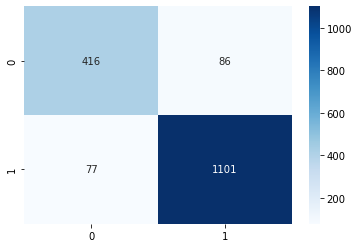

In [100]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
data=confusion_matrix(y_test, y_pred)

sns.heatmap(data, annot=True,fmt="d",cmap='Blues')

### GradientBoostingClassifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
clf = GradientBoostingClassifier().fit(x, y_train)
y_pred = clf.predict(y)
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [96]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       502
           1       0.97      0.91      0.94      1178

    accuracy                           0.92      1680
   macro avg       0.89      0.92      0.91      1680
weighted avg       0.92      0.92      0.92      1680



<IPython.core.display.Javascript object>

<AxesSubplot:>

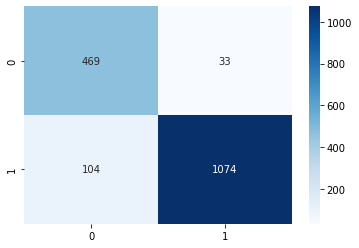

In [97]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
data=confusion_matrix(y_test, y_pred)

sns.heatmap(data, annot=True,fmt="d",cmap='Blues')